# Aggregated Evaluation

In [28]:

import os , sys
import sklearn.metrics as metrics
import pylab as pl
import pandas as pd

In [29]:
data_auroc = pd.DataFrame(columns = ['rbp', 'roc_auc_score', 'pr_auc_score'])

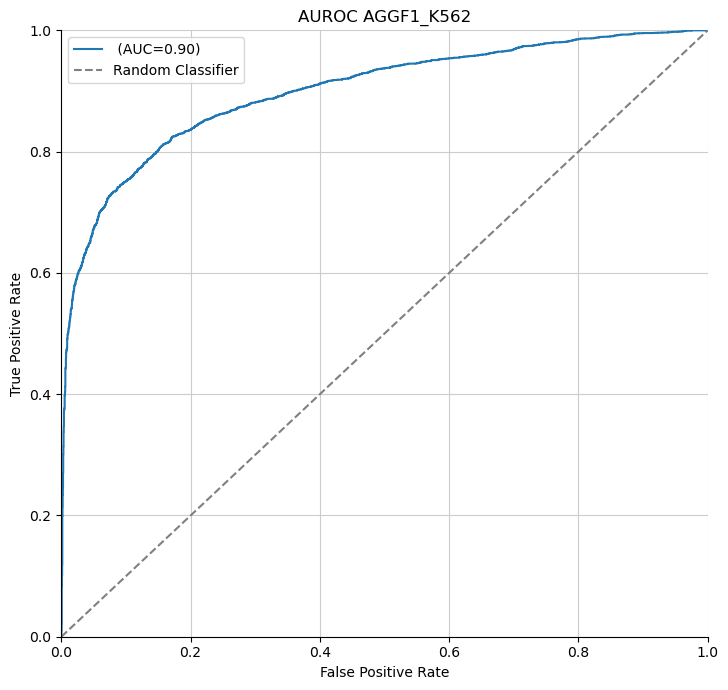

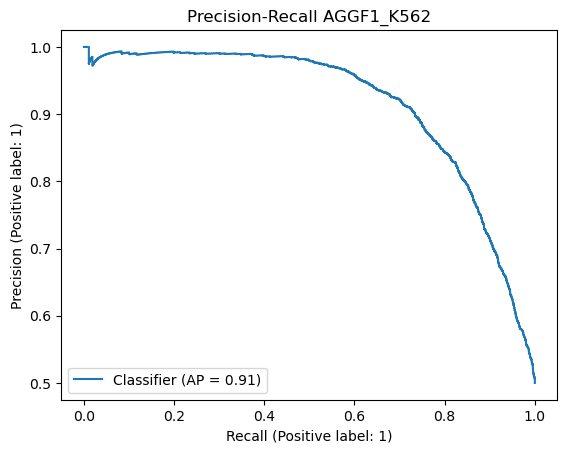

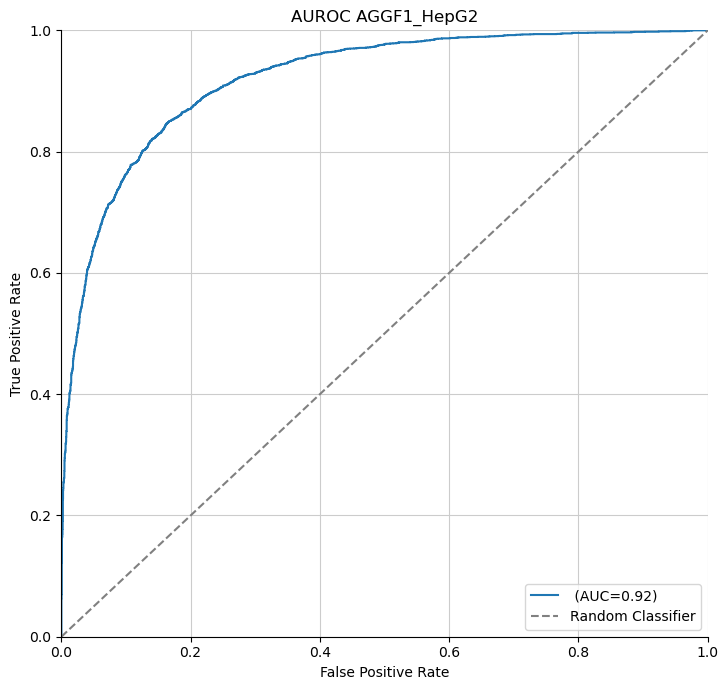

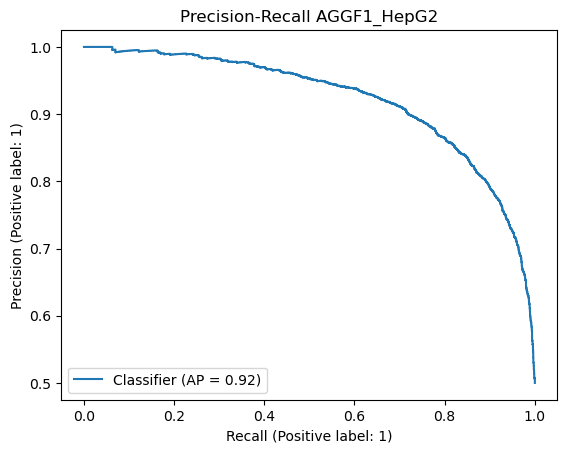

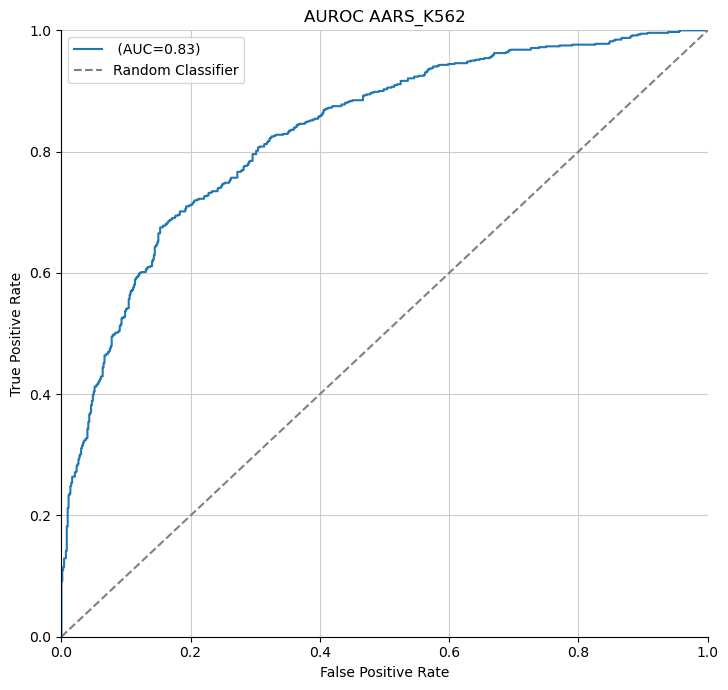

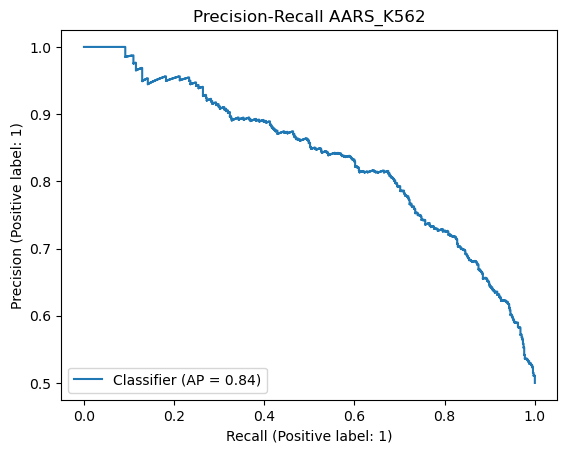

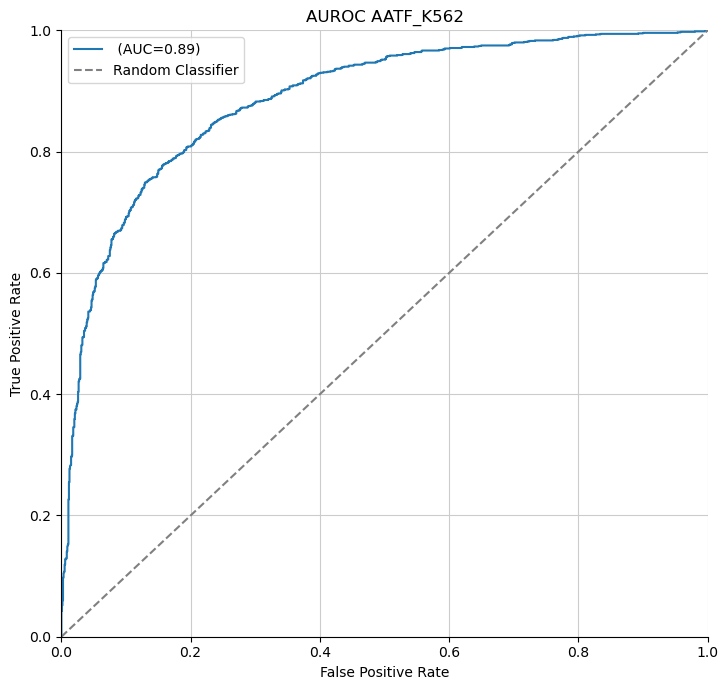

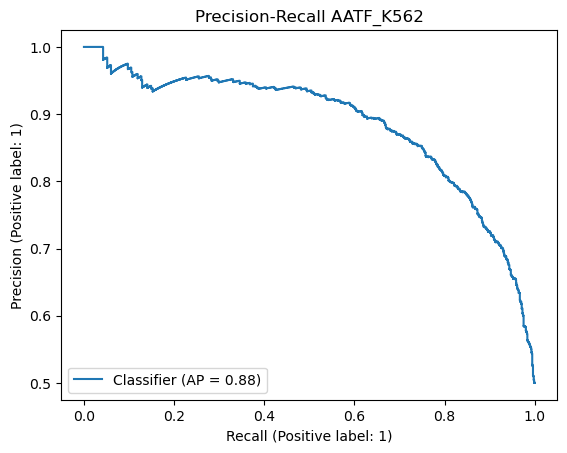

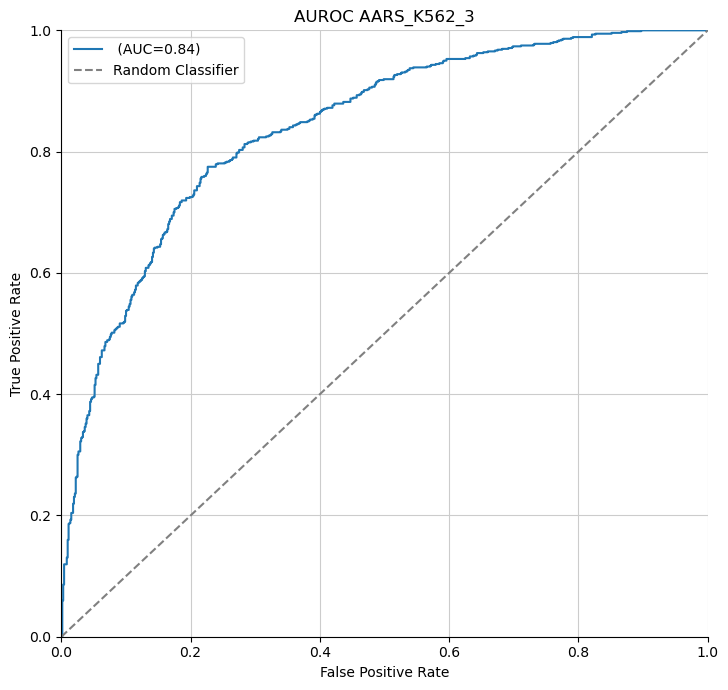

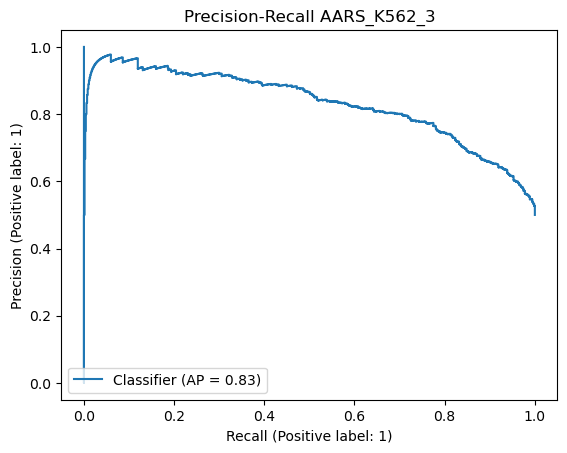

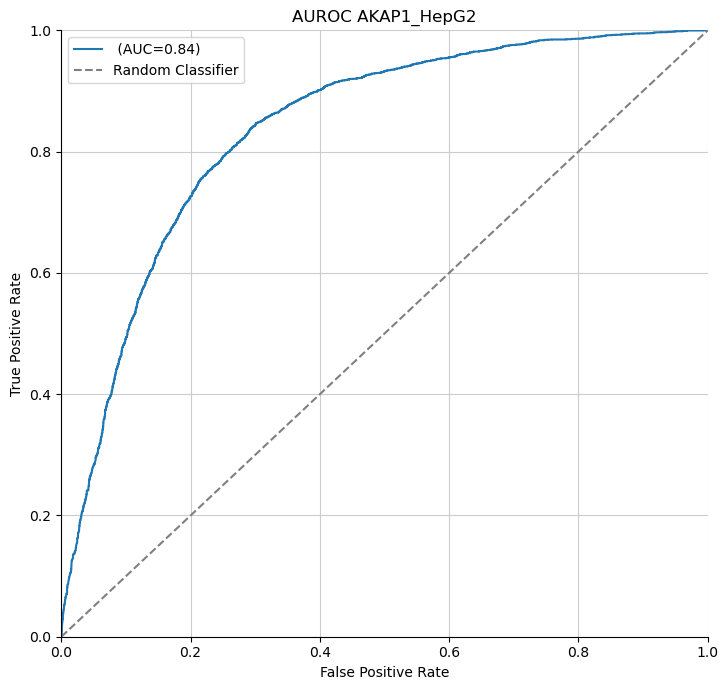

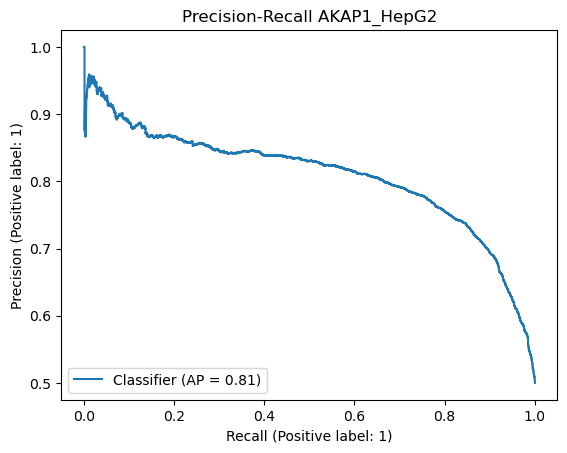

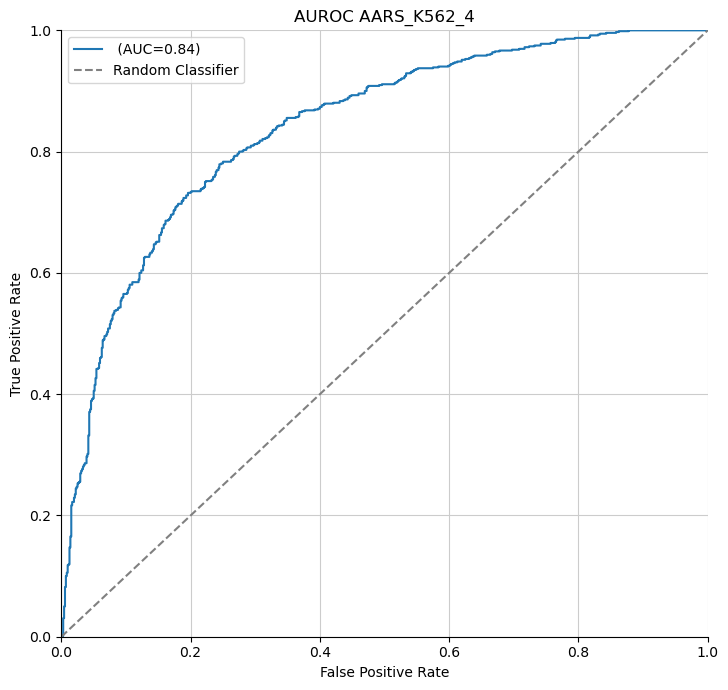

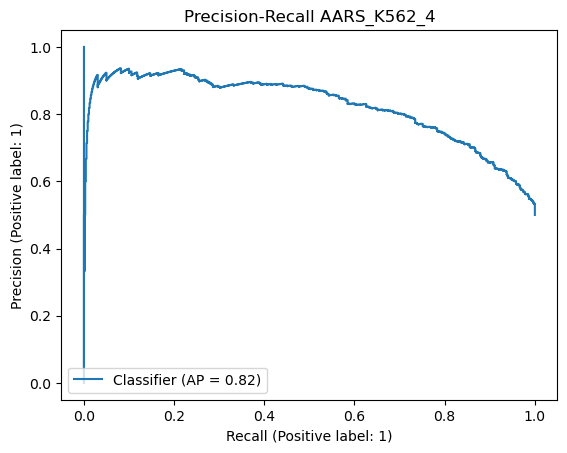

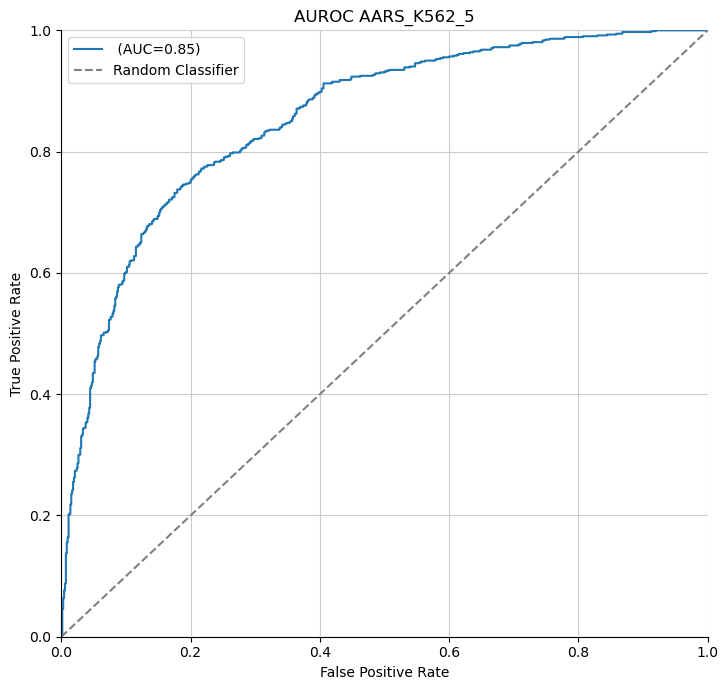

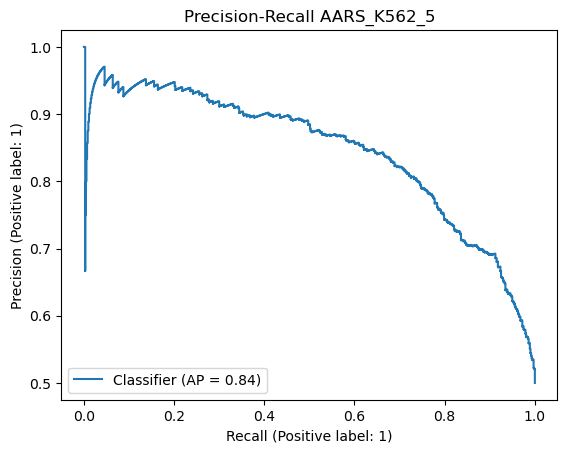

In [30]:
#auroc and auprc plots of all models separately and then boxplot of all roc_values
from matplotlib import pyplot as pt

path = 'predictions/'
directory1 = os.listdir(path)



#tic()

for file in directory1:
    
    
    #print(file)
    # Compute metrics for ROC Curve
    df = pd.read_csv(path + '/' + file)
    
    #roc_auc
    fpr, tpr, thresholds = metrics.roc_curve(df['True'], df['Predictions'], drop_intermediate=False)
    
    roc_auc = metrics.roc_auc_score(df['True'], df['Predictions'])
    

    # Generate figure
    fig = pl.figure(figsize=(14,7))
    ax = fig.add_subplot(121)

    pl.plot(fpr, tpr, label=" (AUC=%.2f)" % roc_auc)
    ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.grid(color="#CCCCCC")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rbp = str(file).split('.')[0]
    pt.title('AUROC %s' % rbp)
    pl.legend()
    pl.tight_layout()
    
    
    # pr_auc
    from sklearn.metrics import average_precision_score, precision_recall_curve
    from sklearn.metrics import PrecisionRecallDisplay
    average_precision = average_precision_score(df['True'], df['Predictions'])
    
    display = PrecisionRecallDisplay.from_predictions(df['True'], df['Predictions'])
    _ = display.ax_.set_title("Precision-Recall %s" % rbp)
    
    datafile= pd.DataFrame([[rbp, roc_auc, average_precision]], columns = ['rbp', 'roc_auc_score', 'pr_auc_score'] )
   
    
    data_auroc = pd.concat([data_auroc,datafile])


In [31]:
data_auroc

,rbp,roc_auc_score,pr_auc_score
0,AGGF1_K562,0.899086,0.914512
0,AGGF1_HepG2,0.920108,0.921142
0,AARS_K562,0.831049,0.835061
0,AATF_K562,0.886944,0.884373
0,AARS_K562_3,0.839500,0.831589
0,AKAP1_HepG2,0.836762,0.808058
0,AARS_K562_4,0.839340,0.823640
0,AARS_K562_5,0.853551,0.844688


<AxesSubplot: xlabel='roc_auc_score'>

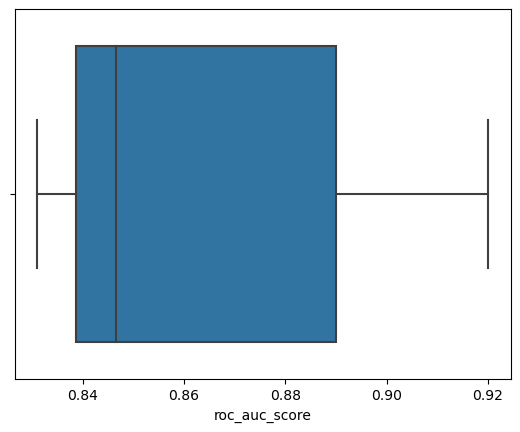

In [32]:
import seaborn as sns
sns.boxplot(x=data_auroc["roc_auc_score"])

<AxesSubplot: xlabel='pr_auc_score'>

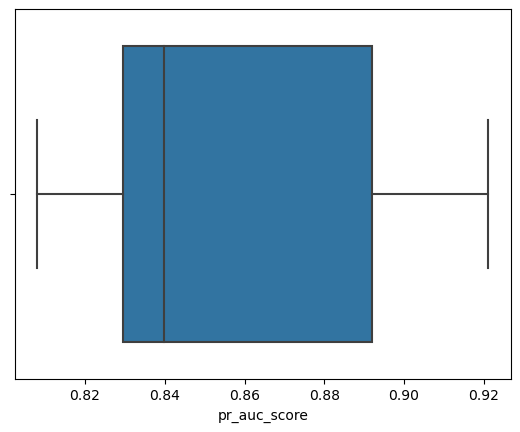

In [33]:
sns.boxplot(x=data_auroc["pr_auc_score"])